# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** 

When running the agent.py, following points are observed:

 - First, the smartcab is not moving and changing its state throughout the simulation hence state never gets updated and it takes no action. There are some other cars also in the traffic lanes. Smartcab receives rewards based on the traffic light and incoming traffic. Sometimes receives postive rewards ad sometimes negative.
 - For Green Light:
   1. Even if the traffic light changes to green and there is no ongoing traffic, the smartcab is not moving hence gets the       negative rewards e.g. No action taken (rewarded = -4.76) as the light is green and there is no on going traffic but the smartcab is idled. Next time when the traffic light changes to green and there is no ongoing traffic, the rewards are -5.82, -5.29, -4.62 and so on...
   2. When there is on going traffic with green light, it receives some small positive reward for being safe.
 - For Red Light:
   1. The smartcab is not moving so it is idle and hence gets the small positive rewards e.g. No action taken (rewarded = 2.29) as it is idle on red light. Next time when cab is idle at red light, rewards are 1.29, 1.69, 1.24 and so on... 
 - It looks like that both the negative and positive rewards are random numbers. Also smartcab is not forced to meet deadline and is not set to learn.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
 - From agent.py file, following three flags are chosen:
    1. __learning:__ This flag by default is false but can be set to true when initializing LearningAgent class. If set to true then driving agent is forced to use Q-Learning Algorithm
    2. __display:__ This flag is set to true by default. If set to false, then visual simulation will be disabled which can
        make the trials go faster.
    3. __enforce_deadline:__ This flag is set to true to enforce deadline, If deadline is enforced then penalty will be given based on remaining time.
 - In the environment.python file, def act(self, agent, action): function is called when an agent performs an action.
 - In the simulator.py file, there are two functions render_text() and render()
    1. __render_text():__ This function will display the trial data on the terminal or command prompt (non GUI render display of the simulation). This function is always called to show the data.
    2. __render():__ This function will display trial data on GUI (GUI render display of the simulation). This function is called based on the value of flag display. If display is set to true then it is called. 
 - In planner.py file, the next_waypoint() function checks East-West direction first and then North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


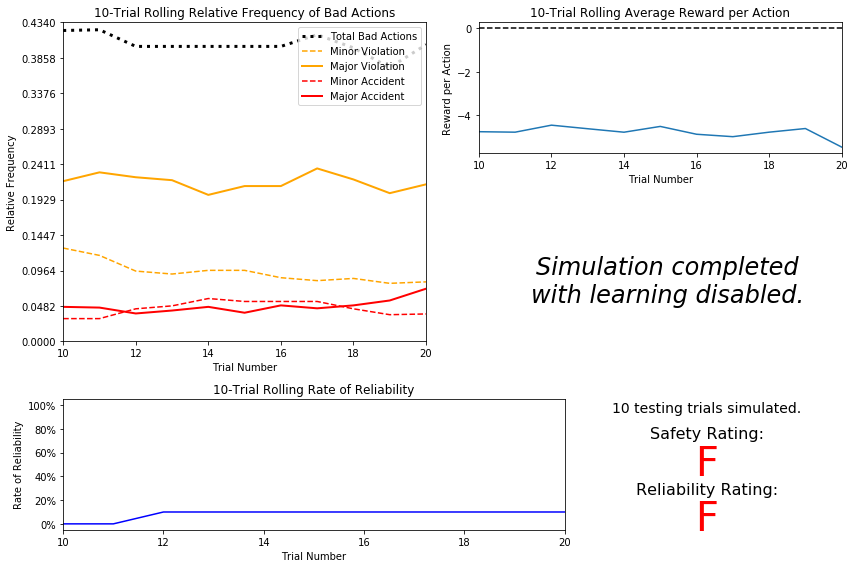

In [5]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

First this simulation is completed without learning (learning is disabled, so the actions are chosen randomly).

If we will look at the first graph i.e. 10-Trial Rolling frequency of bad actions, it predicts that the driving agent makes the bad decisions frequently (43%). There are minor violations, major violations, minor accidents and major accidents as well due to bad decisions. The relative frequency of major violation is more than the minor violation throughout the trials (22%). The relative frequency of major accidents is 4% - 9% and of minor accidents is 3%.

As the actions are chosen randomly and agent is not learning anything so the rate of reliabilty does not make any sense and is not improved.

The second graph shows on average the agent receives heavy negative rewards for its actions indicating that random actions are not correct to reach the destination. The rewards suggest that the agent has been penalized heavily.

As the number of trials increases, the outcome of results does not change significantly as there is no learning.

From the above visualization, it seems that this smartcab would not be considered as safe and reliable because it is causing major and minor accidents and also does not reach the destination on time. After 10 testng trials its safety as well as reliable rating both are F means (Agent causes at least one major accident, such as driving through a red light with cross-traffic and Agent fails to reach the destination on time for at least 60% of trips.)

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
The features which are availble to the agent are: waypoint, the intersection inputs and the deadline. All these features are important for the smartcab. But we can include all these features in agent's state because in practice, the agent has to learn in finite time with observable state information. Therefore, if we have too many states, the agent might not be able to visit all the states in the given time. If we have too few states, the agent might not be able to distinguish certain states which call for truly different actions and hence would fail. Hence We have to define state in such a way that it should not be difficult for agent to learn. So waypoint and partial inputs (light, left, oncoming) can be included in agent's state.

 - __waypoint:__ It is important for the smartcab to know which is the direction or next waypoint the smartcab should drive leading to the destination. So it should be the part of agent's state

 - __inputs:__ The inputs is the most relevant feature, as it is giving important information regarding traffic light and about current traffic situation. Input includes following info:
    - __light:__ It is used to determine If light is green is it safe to go in any direction or it is more efficient to wait to go in the waypoint direction on green, If light is red is it safe to conditionally take an action or it is more efficient to wait for a green light to go in the waypoint direction or take a right on the red light when it's safe. It should be included in the agent's state.
    - __left:__ Left determines if it's safe to make a right on red light when the left car tries to move forward. It should be included in agent's state.
    - __right:__ It does not matter which way the traffic from right is headed. Hence it can be excluded from agent's state.
    - __oncoming:__ Oncoming determines if it is safe to make a left on green or if it is safe to make a right on any light when the oncoming car tries to make a left turn. It should be included in agemt's state.

 - __deadline:__ As deadline is an integer number and keeps changing over time including it would increase the state space significantly, so it should not be a part of the agent's state.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** 

We can calculate the size of the state space based on the features selected in ques 4. In agent's state, waypoint and inputs (light, left, oncoming) are included.

 - waypoint can be ('left','right','forward') so number of possibilities =3.
 - inputs further includes
   - __light:__ 'red','green'
   - __left:__ 'free','forward' - We can use USA traffic rules and can reduced the state space e.g. only traffic from left that is headed 'Forward' affects learning agent. So we can combine the remaining three values to a single value 'free'.
   - __oncoming:__ 'left','free','forward' - Similarly If oncoming traffic is either 'None' or headed 'Right', it does not affect and hence we can combine these two values to a single value 'free'.
    
 so the total number of possiblities for input = 2 $*$ 2 $*$ 3 = 12.
 
 The size of the state space = Possible waypoints $*$ Possible Inputs
 = 3 $*$ 12 = 36
                             
The driving agent can easily learn a policy within a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

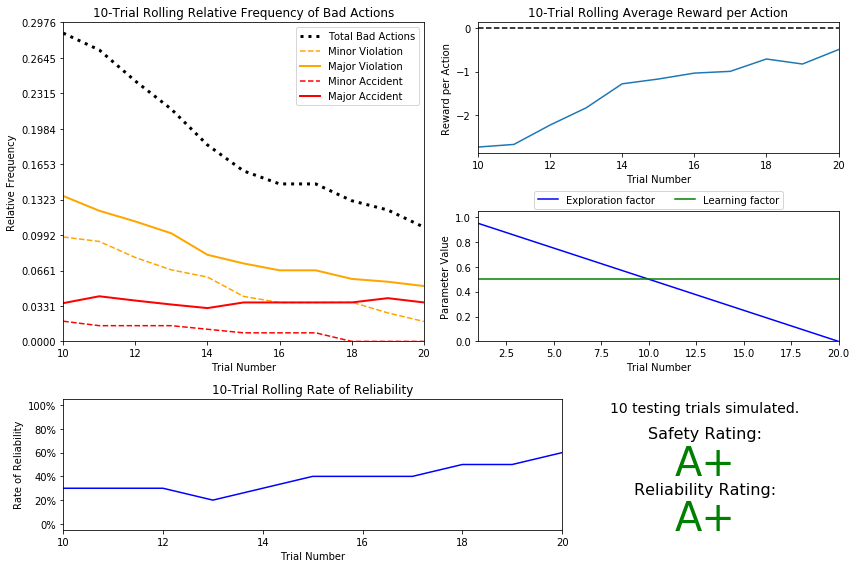

In [67]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

After implementing Q-Learning, there is improvement in driving agent's behaviour. But there is similarity in getting rewards, both basic driving agent and default Q-Learning agent gets negative rewards. There is decrease in frequency of minor violations, major violations, minor accidents and major accidents also.

The driving agent took 20 training trials before testing. The condition to start testing is $\epsilon$ tolerance < $\epsilon$ and we are using decay function $\epsilon$(t+1) = $\epsilon$ (t) - 0.05. In our case $\epsilon$ tolerance = 0.05 and $\epsilon$ is 1.0 (default) 

so, $\epsilon$(t+1) = $\epsilon$ (t) - 0.05

$\epsilon$ (t)  = $\epsilon$ (t-1) - 0.05

= $\epsilon$ (t-2) - 0.05 - 0.05
                                     
.
                                       
.
                                       
0.05 < $\epsilon$ (0) - 0.05t
                                
0.05 < 1.0 - 0.05t - 0.05
                                
0.05t > 1.0 - 0.05 
                                
t > 0.95/0.05
                                       
t > 19 
                                       
total trials t = 20. which actually make sense

In this case Q values are calculated without using the discount factor(gamma).

The decaying function $\epsilon$ looks like represented accurately depicting the straight line $\epsilon$(t+1) = $\epsilon$ (t) - 0.05

As the number of training trials increased, the number of bad actions decreased and the average reward increased showing improvement over non learning simulation.

The rate of reliabilty is increased which is a good achievement for driving agent. The safety and reliabilty ratings improved from F to A+ and A+ (I ran the code 3 times. second time got D and A+ and luckily in 3rd go got A+ and A+). Intial driving agent's ratings were poor but now improved to good extent.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

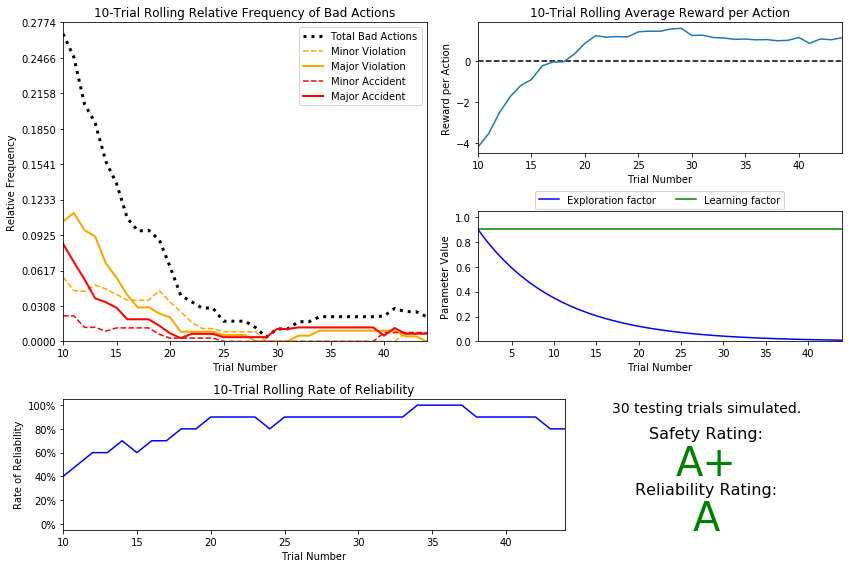

In [66]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

From the graphs, we can say finally the agent gets positive rewards with almost 100% rate of reliabilty. Also total number of bad actions taken, minor violation, major violation, minor accidents, major accidents decreases almost to 0 which is a very good improvement and achievement. 

Below obeservations are made:
 - Decaying function $\epsilon$ $*=$ $\alpha$ is used.
 - 44 training trials were needed before begin testing.
 - with $\alpha$ =0.9 and $\epsilon$ tolerance = 0.01. I used these values because I want to add more training trials before testing.
 - It is having A+ safety and A reliability rating, compared to the default Q-learner's A+ safety and A+ reliability rating. The reliability and safety remained relatively the same.(should not get A+ and A+ from default Q-Learner). 
 - I would say that the Q-learner results show that the driving agent successfully learned an appropriate policy for this environment.
 - I am very much satisfied with the safety and reliabilty ratings of the smartcab.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1. The optimal policy for the smartcab in the given environment is:
  - To reach the destination in minimum possible time.
  - Not incur any penalties (by obeying all traffic rules and no collisions with other cars).
  
  From the environment, possible set of instructions would be (using agent's state - ('light', 'oncoming', 'left', 'waypoint')): 
 - On green light move towards 'waypoint' direction provided agent is not trying to make a left when there is an oncoming vehicle driving forward or when agent is not trying to make a right when there is an oncoming vehicle trying to make a left. If so is the case (make a left or make a right) then wait until there is no oncoming vehicle trying to drive forward or left.
 - On red light do not move but agent can make a right, If so is the case(to make a right) check for an oncoming vehicle turning left or an left vehicle driving forward, if no vehicle then move otherwise wait until there is no vehicle.

2. From the 'sim_improved-learning.txt', we will investigate the results for each state that has been recorded from the simulation. In this case agent's state is based on ('light', 'oncoming', 'left', 'waypoint'), we will compare with this.

            ('green', 'left', 'forward', 'left')
                 -- forward : 0.00
                 -- right : 0.00
                 -- None : -4.23
                 -- left : 1.49

          The policy is not correct as there is oncoming and left traffic and policy is suggesting to go left. 

            ('green', 'left', 'free', 'right')
                 -- forward : -0.04
                 -- right : 0.70
                 -- None : 0.00
                 -- left : 0.00

            ('red', 'left', 'free', 'right')
                 -- forward : -39.01
                 -- right : 0.88
                 -- None : 0.22
                 -- left : 0.00
 
            ('green', 'left', 'forward', 'right')
                 -- forward : 0.00
                 -- right : 2.09
                 -- None : 0.00
                 -- left : 0.00
 
          The policy is not correct for the given state as oncoming is making left and policy is suggesting for right.

            ('green', 'left', 'free', 'left')
                 -- forward : 0.49
                 -- right : 0.00
                 -- None : -4.16
                 -- left : 1.82

         The policy is not correct as there is oncoming traffic towards left and the action with highest value is also left.

            ('green', 'forward', 'forward', 'right')
                 -- forward : 0.50
                 -- right : 0.00
                 -- None : 0.00
                 -- left : 0.00
 
            ('green', 'free', 'forward', 'forward')
                 -- forward : 1.95
                 -- right : 0.00
                 -- None : 0.00
                 -- left : -0.63
 
            ('green', 'free', 'forward', 'right')
                 -- forward : 1.36
                 -- right : 0.00
                 -- None : -4.99
                 -- left : -0.15

            ('green', 'forward', 'forward', 'forward')
                 -- forward : 2.27
                 -- right : 0.00
                 -- None : 0.00
                 -- left : 0.00
 
          The policy is not correct as left traffic is forward and the action also suggests forward

            ('green', 'left', 'forward', 'forward')
                 -- forward : 1.89
                 -- right : 0.00
                 -- None : -4.83
                 -- left : 0.00

           ('green', 'left', 'free', 'forward')
                 -- forward : 1.91
                 -- right : 0.95
                 -- None : -3.77
                 -- left : 0.77

          The policy is not correct as oncoming is towards left and action with highest value is forward.

           ('green', 'forward', 'forward', 'left')
                 -- forward : 0.00
                 -- right : 1.05
                 -- None : 0.00
                 -- left : -17.75

           ('green', 'free', 'forward', 'left')
                 -- forward : 0.00
                 -- right : 1.54
                 -- None : -4.18
                 -- left : 0.00

         The policy is not correct as left traffic is forward and action with highest value is right.

           ('green', 'forward', 'free', 'right')
                 -- forward : -0.31
                 -- right : 0.00
                 -- None : -5.05
                 -- left : -18.01

           ('green', 'free', 'free', 'right')
                 -- forward : -0.09
                 -- right : 2.53
                 -- None : -4.69
                 -- left : 0.00

           ('red', 'forward', 'forward', 'right')
                 -- forward : -36.31
                 -- right : 0.00
                 -- None : 0.00
                 -- left : 0.00

           ('red', 'free', 'forward', 'left')
                 -- forward : -40.54
                 -- right : 0.00
                 -- None : 1.16
                 -- left : 0.00

           ('green', 'free', 'free', 'left')
                 -- forward : -0.04
                 -- right : 0.38
                 -- None : -4.54
                 -- left : -18.47

           ('red', 'forward', 'free', 'forward')
                 -- forward : -9.19
                 -- right : 0.28
                 -- None : 2.42
                 -- left : 0.00

           ('red', 'forward', 'forward', 'left')
                 -- forward : -35.55
                 -- right : 0.00
                 -- None : 0.00
                 -- left : -36.83

           ('red', 'forward', 'forward', 'forward')
                 -- forward : 0.00
                 -- right : 0.00
                 -- None : 1.15
                 -- left : -36.50

           ('red', 'forward', 'free', 'left')
                 -- forward : -9.30
                 -- right : -0.13
                 -- None : 1.50
                 -- left : -8.75

           ('green', 'free', 'free', 'forward')
                 -- forward : 2.08
                 -- right : 0.53
                 -- None : -5.50
                 -- left : -0.13

           ('red', 'left', 'free', 'left')
                 -- forward : -8.17
                 -- right : -0.03
                 -- None : 0.77
                 -- left : -8.48

           ('red', 'free', 'free', 'right')
                 -- forward : -10.26
                 -- right : 2.30
                 -- None : 0.33
                 -- left : -10.28

            ('red', 'forward', 'free', 'right')
                 -- forward : -12.29
                 -- right : 0.77
                 -- None : 0.52
                 -- left : 0.00

            ('red', 'free', 'forward', 'right')
                 -- forward : -36.79
                 -- right : -17.92
                 -- None : 1.36
                 -- left : -40.09

            ('red', 'left', 'free', 'forward')
                 -- forward : -9.15
                 -- right : 0.16
                 -- None : 1.33
                 -- left : -9.61

           ('red', 'left', 'forward', 'forward')
                 -- forward : 0.00
                 -- right : 0.00
                 -- None : 1.07
                 -- left : 0.00

           ('red', 'free', 'forward', 'forward')
                 -- forward : 0.00
                 -- right : 0.00
                 -- None : 2.14
                 -- left : 0.00

           ('red', 'free', 'free', 'left')
                 -- forward : -36.29
                 -- right : 0.02
                 -- None : 1.12
                 -- left : -37.58

           ('red', 'free', 'free', 'forward')
                 -- forward : -9.52
                 -- right : -0.08
                 -- None : 1.42
                 -- left : -37.17

           ('green', 'forward', 'free', 'left')
                 -- forward : -0.42
                 -- right : 0.38
                 -- None : 0.00
                 -- left : -19.54

           ('green', 'forward', 'free', 'forward')
                 -- forward : 1.96
                 -- right : 0.00
                 -- None : 0.00
                 -- left : 0.00

           ('red', 'left', 'forward', 'left')
                 -- forward : 0.00
                 -- right : 0.00
                 -- None : 1.84
                 -- left : -35.74

        For all these states policy is correct.

           ('red', 'left', 'forward', 'right')
                 -- forward : 0.00
                 -- right : 0.00
                 -- None : 0.00
                 -- left : 0.00

        Here action will be random can not say anything about policy.
        
3. From the Q table we can say for following state smartcab learned optimal policy,

             ('green', 'forward', 'free', 'right')
                 -- forward : -0.31
                 -- right : 0.00
                 -- None : -5.05
                 -- left : -18.01
             
             ('green', 'free', 'free', 'right')
                 -- forward : -0.09
                 -- right : 2.53
                 -- None : -4.69
                 -- left : 0.00
        
        In both these cases left traffic is free and oncoming is forward/free, taking right action is optimal which is also according to waypoint.

             ('red', 'free', 'forward', 'left')
                 -- forward : -40.54
                 -- right : 0.00
                 -- None : 1.16
                 -- left : 0.00

             ('red', 'forward', 'free', 'forward')
                 -- forward : -9.19
                 -- right : 0.28
                 -- None : 2.42
                 -- left : 0.00

          On red light, action None is having highest value which is optimal.
          
             ('green', 'free', 'free', 'left')
                 -- forward : -0.04
                 -- right : 0.38
                 -- None : -4.54
                 -- left : -18.47
             
             Both side traffic is free can take right easily.

4. For the following states smartcab did not learn optimal policy

            ('green', 'left', 'forward', 'left')
                 -- forward : 0.00
                 -- right : 0.00
                 -- None : -4.23
                 -- left : 1.49

          The policy is not correct as there is oncoming and left traffic and policy is suggesting to go left. 

            ('green', 'left', 'free', 'left')
                 -- forward : 0.49
                 -- right : 0.00
                 -- None : -4.16
                 -- left : 1.82

         The policy is not correct as there is oncoming traffic towards left and the action with highest value is also left.
         
      We can say we have lack of training examples for these states so smartcab may have not learned the correct policy for the given states. If more training trials will be there then might be smartcab learned optimal policy for these states also.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Two characteristics can be figured out which are invalidating the use of future rewards in the Q-Learning algorithm:
1. The smartcab is making decisions which are independent of future positions as they are not connected by information. The smartcab does not know about the number of cars, traffic light, etc. at the next intersections. At each intersection, the decision is made independently of all the others, and so future rewards won't work.
2. In environment, destination and other features for smartcab are picked randomly for each trial. The environment is non-deterministic. With each new trial, some new laws are created, but without information on previous trials. So, the long-term reward associated with the smartcab's particular position in this environment won't work.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.